In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


sync_confirmed_list_train_all = [[23,27,28,29,30,32,33,37,38,39,40,41,42,45,46,50,53,56,57,59,62,63,66,67,68,69,71,72,73],
                                [9,10,11,14,15,17,18,24,25,29,31,39,40,41,42,50,53,56,57,59,62,63,66,67,68,69,71,72,73],
                                [9,10,11,14,15,17,18,23,24,25,27,28,30,31,32,33,37,38,45,46,56,57,62,67,68,69,71,72,73],
                                [9,10,11,14,15,17,18,23,24,25,27,28,29,30,31,32,33,37,38,39,40,41,42,45,46,50,53,59,63,66]]

sync_confirmed_list_test_all = [[9,10,11,14,15,17,18,24,25,31],
                               [23,27,28,30,32,33,37,38,45,46],
                               [29,39,40,41,42,50,53,59,63,66],
                               [56,57,62,67,68,69,71,72,73]]



# sync_confirmed_list_train_all = [[23,27,28,29,30,32,33,37,38,39,40,41,42,45,46,50,53,56,57,59,62,63,66,67],[50,53,56,57,59,62,63,66,67,68,69,71,72,73,9,10,11,14,15,17,18,24,25,31],[23,27,28,29,30,32,33,37,38,39,40,41,72,73,9,10,11,14,15,17,18,24,25,31],[23,27,29,30,33,37,39,40,42,45,50,53,57,59,63,66,68,69,72,73,10,11,15,17]]

# sync_confirmed_list_test_all = [[68,69,71,72,73,9,10,11,14,15,17,18,24,25,31],[23,27,28,29,30,32,33,37,38,39,40,41,42,45,46],[42,45,46,50,53,56,57,59,62,63,66,67,68,69,71],[28,32,38,41,46,56,62,67,71,9,14,24,25,31,18]]

sync_confirmed_list_train = sync_confirmed_list_train_all[3]
sync_confirmed_list_test = sync_confirmed_list_test_all[3]

tolerance_degree = 0

# Participant_file_name = 'ML-PersRef_ML_Final_dataset/datapoints_rawdata_first_middle_points_with_building_width_outlier_removed_'
#Participant_file_name = 'ML-PersRef_ML_Final_dataset/datapoints_rawdata_first_middle_points_with_building_width_splitted_near_'
#Participant_file_name = 'ML-PersRef_ML_Final_dataset/datapoints_rawdata_first_middle_points_with_building_width_splitted_far_'

Participant_file_name = 'ML-PersRef_ML_Final_dataset/datapoints_rawdata_first_middle_points_with_building_width_'


# sync_confirmed_list_train, sync_confirmed_list_test = train_test_split(sync_confirmed_list, test_size=0.38, random_state=42)
print(sync_confirmed_list_train)
print(sync_confirmed_list_test)

dataset = []
dataset_test = []

for z in sync_confirmed_list_train:
    dataset.append(pd.read_csv(Participant_file_name + str(z)+'.csv'))
    
for j in sync_confirmed_list_test:
    dataset_test.append(pd.read_csv(Participant_file_name + str(j)+'.csv'))
    
dataset = pd.concat(dataset).reset_index(drop=True)
dataset_test = pd.concat(dataset_test).reset_index(drop=True)
dataset

[9, 10, 11, 14, 15, 17, 18, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 42, 45, 46, 50, 53, 59, 63, 66]
[56, 57, 62, 67, 68, 69, 71, 72, 73]


,Participant,fzd_hands0_fingerTip_coordinates_x,fzd_hands0_fingerTip_coordinates_y,fzd_hands0_fingerTip_coordinates_z,eyegaze_new_coordinates_x,eyegaze_new_coordinates_y,angle_center,Buidling_half_width,eyegaze_new_coordinates_x_without_tablet_&_road_gazes,eyegaze_new_coordinates_y_without_tablet_&_road_gazes,angle_center_scaled,Buidling_half_width_scaled
0,9,-0.336520,-0.179864,-0.324396,277.46,-145.69,12.128292,5.424179,277.46,-145.69,27.252272,12.188130
1,9,-0.194666,-0.185403,-0.268605,299.32,-63.26,15.311622,5.756825,299.32,-63.26,34.405215,12.935585
2,9,-0.151289,-0.367003,-0.310837,-240.02,-49.62,-12.063790,4.512664,NaN,NaN,-27.107337,10.139957
3,9,-0.135248,-0.379231,-0.301818,-332.08,-61.63,-15.840782,4.664043,-332.08,-61.63,-35.594237,10.480104
4,9,-0.234517,-0.255451,-0.245391,113.62,-77.35,8.033576,4.203568,NaN,NaN,18.051446,9.445417
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,66,-0.314104,-0.352774,-0.222713,-309.44,-38.70,-27.408033,3.897213,-309.44,-38.70,-55.939795,7.954212
3758,66,-0.347847,-0.325764,-0.231894,-251.63,70.99,-11.113167,2.320334,-251.63,70.99,-22.681975,4.735802
3759,66,-0.347906,-0.341641,-0.218072,284.38,-60.27,-11.471687,2.413803,284.38,-60.27,-23.413712,4.926572
3760,66,-0.340098,-0.349485,-0.221933,-287.61,-30.84,-12.267457,2.583774,-287.61,-30.84,-25.037879,5.273483


In [2]:
dataset_test

,Participant,fzd_hands0_fingerTip_coordinates_x,fzd_hands0_fingerTip_coordinates_y,fzd_hands0_fingerTip_coordinates_z,eyegaze_new_coordinates_x,eyegaze_new_coordinates_y,angle_center,Buidling_half_width,eyegaze_new_coordinates_x_without_tablet_&_road_gazes,eyegaze_new_coordinates_y_without_tablet_&_road_gazes,angle_center_scaled,Buidling_half_width_scaled
0,56,-0.354740,-0.142584,-0.592539,-93.28,63.53,-7.211206,0.820602,NaN,NaN,-16.023299,1.823379
1,56,-0.352644,-0.140945,-0.583550,813.01,-52.11,-6.597694,0.862626,813.01,-52.11,-14.660076,1.916755
2,56,-0.234600,-0.067257,-0.399754,91.24,-0.47,-5.624505,0.901516,NaN,NaN,-12.497650,2.003169
3,56,-0.145558,-0.400066,-0.351138,94.48,53.36,-6.875854,1.000280,NaN,NaN,-15.278147,2.222622
4,56,-0.414735,0.009352,-0.533011,691.84,-68.14,-9.925296,1.208753,691.84,-68.14,-22.054009,2.685850
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,73,-0.413335,-0.123482,-0.622388,153.42,-341.71,15.075398,5.899251,NaN,NaN,32.427180,12.689289
1164,73,-0.289948,-0.315085,-0.273013,-253.90,-236.24,-10.146488,5.288960,-253.90,-236.24,-21.825096,11.376553
1165,73,-0.305641,-0.172481,-0.260092,263.04,-360.57,9.578394,2.927864,263.04,-360.57,20.603126,6.297835
1166,73,-0.271346,-0.148942,-0.268029,402.18,-246.16,14.553778,5.324814,402.18,-246.16,31.305177,11.453675


In [3]:
regressor = SVR(kernel='rbf', epsilon=2)
#regressor = SVR(kernel='rbf', epsilon=5)


xtrain = dataset.iloc[:,1:5].values.astype(float)
ytrain = dataset.iloc[:,6].values.astype(float)
ytrain_width = dataset.iloc[:,7].values.astype(float)

sc_xtrain = StandardScaler()
#sc_xtrain = MinMaxScaler()

xtrain = sc_xtrain.fit_transform(xtrain)

xtest = dataset_test.iloc[:,1:5].values.astype(float)
ytest = dataset_test.iloc[:,6].values.astype(float)
ytest_width = dataset_test.iloc[:,7].values.astype(float)

sc_xtest = StandardScaler()
#sc_xtest = MinMaxScaler()
xtest = sc_xtest.fit_transform(xtest)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

xtrain_eye_gaze = xtrain[:,-1].reshape(-1, 1)
xtest_eye_gaze = xtest[:,-1].reshape(-1, 1)
xtrain_pointing = xtrain[:,0:3]
xtest_pointing = xtest[:,0:3]
ytrain = ytrain
ytest = ytest



#print(xtrain, xtest, xtrain_eye_gaze, xtest_eye_gaze, xtrain_pointing, xtest_pointing, ytrain, ytest)
print(xtrain.shape, xtest.shape, xtrain_eye_gaze.shape, xtest_eye_gaze.shape, xtrain_pointing.shape, xtest_pointing.shape, ytrain.shape, ytest.shape)

print(np.percentile(ytest_width,50))
print(ytest_width.mean())

print("========================")
print("---------train----------")

regressor.fit(xtrain,ytrain)

print('-----------------')
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtrain)
print(r2_score(ytrain,pred))
print(mean_squared_error(ytrain, pred))
print('-----------------')

print('================================================')
#print(ytrain,pred)
#print(abs(ytrain-pred))
#print(ytrain_width)
relative_width = abs(ytrain-pred)/(ytrain_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

xtrain_fuse = regressor.support_vectors_
ytrain_fuse = ytrain[regressor.support_]

regressor.fit(xtrain_pointing,ytrain)
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtrain_pointing)
print(r2_score(ytrain,pred))
print(mean_squared_error(ytrain, pred))
print('-----------------')

print('================================================')
#print(ytrain,pred)
#print(abs(ytrain-pred))
#print(ytrain_width)
relative_width = abs(ytrain-pred)/(ytrain_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

xtrain_pointing = regressor.support_vectors_
ytrain_pointing = ytrain[regressor.support_]

regressor.fit(xtrain_eye_gaze,ytrain)
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtrain_eye_gaze)
print(r2_score(ytrain,pred))
print(mean_squared_error(ytrain, pred))
print('-----------------')

print('================================================')
#print(ytrain,pred)
#print(abs(ytrain-pred))
#print(ytrain_width)
relative_width = abs(ytrain-pred)/(ytrain_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

xtrain_eye_gaze = regressor.support_vectors_
ytrain_eye_gaze = ytrain[regressor.support_]

print("========================")
print("----------test----------")

regressor.fit(xtrain_fuse,ytrain_fuse)
print('-----------------')
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtest)
print(r2_score(ytest,pred))
print(mean_squared_error(ytest, pred))
print('-----------------')

print('================================================')
#print(ytest,pred)
#print(abs(ytest-pred))
#print(ytest_width)
relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

regressor.fit(xtrain_pointing,ytrain_pointing)
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtest_pointing)
print(r2_score(ytest,pred))
print(mean_squared_error(ytest, pred))
print('-----------------')

print('================================================')
#print(ytest,pred)
#print(abs(ytest-pred))
#print(ytest_width)
relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

regressor.fit(xtrain_eye_gaze,ytrain_eye_gaze)
print(regressor.support_vectors_.shape)
pred=regressor.predict(xtest_eye_gaze)
print(r2_score(ytest,pred))
print(mean_squared_error(ytest, pred))
print('-----------------')

print('================================================')
#print(ytest,pred)
#print(abs(ytest-pred))
#print(ytest_width)
relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
#print(relative_width)
print(relative_width.mean())
print(relative_width.std())
print('================================================')

print(xtrain.shape, xtrain_fuse.shape, xtrain_pointing.shape, xtrain_eye_gaze.shape,  ytrain.shape, ytrain_fuse.shape, ytrain_pointing.shape, ytrain_eye_gaze.shape)

(3762, 4) (1168, 4) (3762,) (1168,)
(3762, 4) (1168, 4) (3762, 1) (1168, 1) (3762, 3) (1168, 3) (3762,) (1168,)
3.3751909649059035
4.286872747178459
---------train----------
-----------------
(2221, 4)
0.28118607016351405
239.57329278798846
-----------------
1.843145551459067
3.1320278896073206
(2273, 3)
0.2570817791908008
247.6070051563149
-----------------
1.9587530043627832
3.2219098077048263
(2454, 1)
0.18025243717698392
273.21343497768976
-----------------
2.2539681459326593
3.1907494596565527
----------test----------
-----------------
(2221, 4)
0.3375461172948514
233.61248084324336
-----------------
1.7375419846208264
3.363009050970493
(2273, 3)
0.3218843830687905
239.13554694999917
-----------------
1.7616273524422192
3.493337221045956
(2454, 1)
0.23392024608328532
270.15585010303414
-----------------
2.17710229525734
3.0471679276640433
(3762, 4) (2221, 4) (2273, 3) (2454, 1) (3762,) (2221,) (2273,) (2454,)


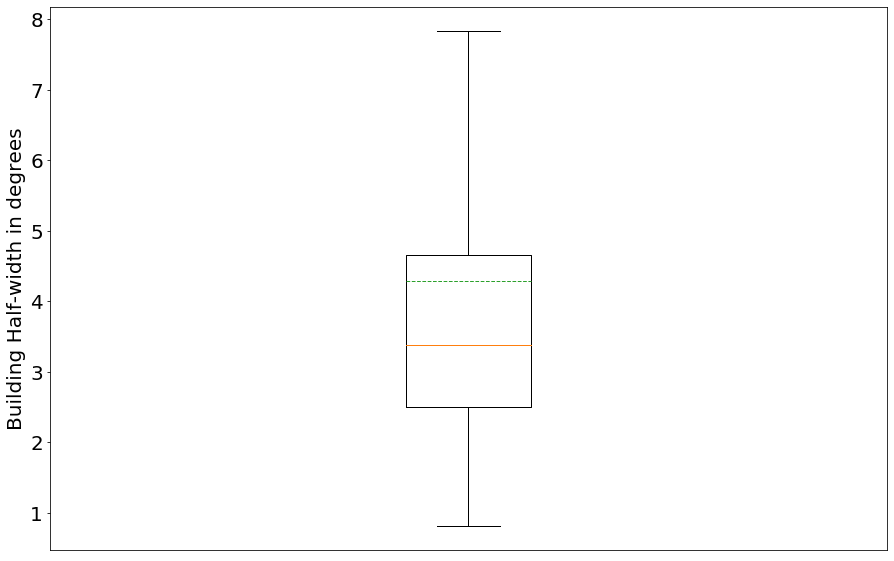

In [4]:
fig1, ax1 = plt.subplots(figsize=(15,10))
#ax1.set_title('Building Half-width Box Plot', fontsize = 20.0)
ax1.boxplot(ytest_width, showfliers=False,showmeans=True, meanline=True)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('Building Half-width in degrees', fontsize = 20.0) # Y label
ax1.tick_params(axis='both', which='major', labelsize=20)

In [5]:
def personalisation_svr_test_train(participant_no,sc_xtrain,sc_xtest,xtrain_fuse,ytrain_fuse,xtrain_pointing,ytrain_pointing,xtrain_eye_gaze,ytrain_eye_gaze,sample_weight_value):

    
#     xtrain = (dataset.iloc[:,1:5].values.astype(float))
#     ytrain = (dataset.iloc[:,-1].values.astype(float))
    
    print('P',participant_no)
    dataset_test_participant = pd.read_csv(Participant_file_name + str(participant_no)+'.csv')


    xtest = dataset_test_participant.iloc[:,1:5].values.astype(float)
    ytest = dataset_test_participant.iloc[:,6:8].values.astype(float)

    #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    #print('------------------------------')

    
    from sklearn.model_selection import train_test_split

    xtrain_participant,xtest, ytrain_participant_both , ytest_both = train_test_split(xtest, ytest, test_size=0.5, random_state=42)
    
    
    
    xtrain_participant = sc_xtrain.fit_transform(xtrain_participant)
    xtrain_eye_gaze_participant = xtrain_participant[:,-1].reshape(-1, 1)
    xtrain_pointing_participant = xtrain_participant[:,0:3]
    ytrain_participant = ytrain_participant_both[:,0]


    xtest = sc_xtest.fit_transform(xtest)
    xtest_eye_gaze = xtest[:,-1].reshape(-1, 1)
    xtest_pointing = xtest[:,0:3]
    ytest = ytest_both[:,0]
    ytest_width = ytest_both[:,1]


#     #############################################################################
#     #get before personalization
    
#     regressor.fit(xtrain_fuse,ytrain_fuse)
#     #print('-----------------')
#     pred=regressor.predict(xtest)
#     print(mean_squared_error(ytest, pred))
#     #print('-----------------')

#     regressor.fit(xtrain_pointing,ytrain_pointing)
#     pred=regressor.predict(xtest_pointing)
#     print(mean_squared_error(ytest, pred))
#     #print('-----------------')


#     regressor.fit(xtrain_eye_gaze,ytrain_eye_gaze)
#     pred=regressor.predict(xtest_eye_gaze)
#     print(mean_squared_error(ytest, pred))
#     #print('-----------------')    
#     #############################################################################  

    
    

    #add participants to training
    
    
    xtrain_fuse = np.concatenate((xtrain_fuse, xtrain_participant),axis=0)
    ytrain_fuse = np.concatenate((ytrain_fuse, ytrain_participant),axis=0)
    
    xtrain_pointing = np.concatenate((xtrain_pointing, xtrain_pointing_participant),axis=0)
    ytrain_pointing = np.concatenate((ytrain_pointing, ytrain_participant),axis=0)
    
    xtrain_eye_gaze = np.concatenate((xtrain_eye_gaze, xtrain_eye_gaze_participant),axis=0)
    ytrain_eye_gaze = np.concatenate((ytrain_eye_gaze, ytrain_participant),axis=0)

    
    
    #############################################################################
    #get after personalization
    
    

    sample_weight_fuse = 1 * np.ones((len(ytrain_fuse)))
    sample_weight_fuse[-len(ytrain_participant):] *= sample_weight_value
    
    sample_weight_point = 1 * np.ones((len(ytrain_pointing)))
    sample_weight_point[-len(ytrain_participant):] *= sample_weight_value

    sample_weight_gaze = 1 * np.ones((len(ytrain_eye_gaze)))
    sample_weight_gaze[-len(ytrain_participant):] *= sample_weight_value
    
#     print('--------=======---------')
#     print(sample_weight_fuse.shape,sample_weight_point.shape,sample_weight_gaze.shape)
#     #print(sample_weight_fuse,sample_weight_point,sample_weight_gaze)
#     print('--------=======---------')
    
    
    
    regressor.fit(xtrain_fuse,ytrain_fuse,sample_weight=sample_weight_fuse)
    #print('-----------------')
    pred=regressor.predict(xtest)
    print(mean_squared_error(ytest, pred))
    #print('-----------------')
    
    print('================================================')
    #print(ytest,pred)
    #print(abs(ytest-pred))
    #print(ytest_width)
    relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
    #print(relative_width)
    print(relative_width.mean())
    print(relative_width.std())
    print('================================================')

    regressor.fit(xtrain_pointing,ytrain_pointing,sample_weight=sample_weight_point)
    pred=regressor.predict(xtest_pointing)
    print(mean_squared_error(ytest, pred))
    #print('-----------------')

    print('================================================')
    #print(ytest,pred)
    #print(abs(ytest-pred))
    #print(ytest_width)
    relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
    #print(relative_width)
    print(relative_width.mean())
    print(relative_width.std())
    print('================================================')

    regressor.fit(xtrain_eye_gaze,ytrain_eye_gaze,sample_weight=sample_weight_gaze)
    pred=regressor.predict(xtest_eye_gaze)
    print(mean_squared_error(ytest, pred))
    
    print('================================================')
    #print(ytest,pred)
    #print(abs(ytest-pred))
    #print(ytest_width)
    relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
    #print(relative_width)
    print(relative_width.mean())
    print(relative_width.std())
    print('================================================')
    
    #print('-----------------')     
    #############################################################################
    
    
    #print(xtrain.shape, xtest.shape, xtrain_eye_gaze.shape, xtest_eye_gaze.shape, xtrain_pointing.shape, xtest_pointing.shape, ytrain.shape, ytest.shape)
    #print('------------------------------')
    
    #print('------=====begin inside loop=====------')
    
    
    MSE_fusion = []
    MSE_pointing = []
    MSE_Gaze = []
    
    RMDE_fusion = []
    RMDE_pointing = []
    RMDE_Gaze = []
    
    for participant_no_inside in sync_confirmed_list_test:
    
        #print('P',participant_no_inside)
        dataset_test_participant_2 = pd.read_csv(Participant_file_name+ str(participant_no_inside)+'.csv')


        xtest = dataset_test_participant_2.iloc[:,1:5].values.astype(float)
        ytest = dataset_test_participant_2.iloc[:,6:8].values.astype(float)
        ssss, xtest, ssss , ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=42)
        sc_xtest = StandardScaler()
        #sc_xtest = MinMaxScaler()
        xtest = sc_xtest.fit_transform(xtest)


        xtest_eye_gaze = xtest[:,-1].reshape(-1, 1)
        xtest_pointing = xtest[:,0:3]
        ytest_width = ytest[:,1]
        ytest = ytest[:,0]
        


        regressor.fit(xtrain_fuse,ytrain_fuse,sample_weight=sample_weight_fuse)
        pred=regressor.predict(xtest)
        MSE_fusion.append(mean_squared_error(ytest, pred))
        relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
        RMDE_fusion.append(relative_width.mean())
        
        regressor.fit(xtrain_pointing,ytrain_pointing,sample_weight=sample_weight_point)
        pred=regressor.predict(xtest_pointing)
        MSE_pointing.append(mean_squared_error(ytest, pred))
        relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
        RMDE_pointing.append(relative_width.mean())

        regressor.fit(xtrain_eye_gaze,ytrain_eye_gaze,sample_weight=sample_weight_gaze)
        pred=regressor.predict(xtest_eye_gaze)
        MSE_Gaze.append(mean_squared_error(ytest, pred))
        relative_width = abs(ytest-pred)/(ytest_width + tolerance_degree)
        RMDE_Gaze.append(relative_width.mean())        

    appended_MSE_fusion.append(MSE_fusion)
    appended_MSE_pointing.append(MSE_pointing)
    appended_MSE_Gaze.append(MSE_Gaze)
    
    appended_RMDE_fusion.append(RMDE_fusion)
    appended_RMDE_pointing.append(RMDE_pointing)
    appended_RMDE_Gaze.append(RMDE_Gaze)
    
    #print('------=====end inside loop=====------')
    #print('------=====end Participant=====------')
    print('------=========================------')

In [6]:
sample_weight_values = [15]

average_fusion_MSE_weights = []
average_fusion_MSE_non_weights_total = []

average_fusion_RMDE_weights = []
average_fusion_RMDE_non_weights_total = []

for sample_weight_value in sample_weight_values:

    average_fusion_MSE_per_weight = []
    average_fusion_RMDE_per_weight = []

    average_fusion_MSE_others_total = []
    average_fusion_RMDE_others_total = []
    
    
    appended_MSE_fusion = []
    appended_MSE_pointing = []
    appended_MSE_Gaze = []

    appended_RMDE_fusion = []
    appended_RMDE_pointing = []
    appended_RMDE_Gaze = []

    for i in sync_confirmed_list_test:
        personalisation_svr_test_train(i,sc_xtrain,sc_xtest,xtrain_fuse,ytrain_fuse,xtrain_pointing,ytrain_pointing,xtrain_eye_gaze,ytrain_eye_gaze,sample_weight_value)

    appended_MSE_fusion = np.array(appended_MSE_fusion)
    appended_MSE_pointing = np.array(appended_MSE_pointing)
    appended_MSE_Gaze = np.array(appended_MSE_Gaze)
    
    appended_RMDE_fusion = np.array(appended_RMDE_fusion)
    appended_RMDE_pointing = np.array(appended_RMDE_pointing)
    appended_RMDE_Gaze = np.array(appended_RMDE_Gaze)

    for column in range(len(appended_MSE_fusion)):
        average_fusion_MSE_others = 0
        average_fusion_RMDE_others = 0
        for row in range(len(appended_MSE_fusion)):
            if row == column:
                average_fusion_MSE_per_weight.append(appended_MSE_fusion[row,column])
                average_fusion_RMDE_per_weight.append(appended_RMDE_fusion[row,column])
            else:
                average_fusion_MSE_others += appended_MSE_fusion[row,column]
                average_fusion_RMDE_others += appended_RMDE_fusion[row,column]
        average_fusion_MSE_others = average_fusion_MSE_others / (len(appended_MSE_fusion)-1)
        average_fusion_RMDE_others = average_fusion_RMDE_others / (len(appended_MSE_fusion)-1)    

        average_fusion_MSE_others_total.append(average_fusion_MSE_others)
        average_fusion_RMDE_others_total.append(average_fusion_RMDE_others)
    
    
#     print(average_fusion_MSE_per_weight)
#     print(average_fusion_RMDE_per_weight)

#     print(average_fusion_MSE_others_total)
#     print(average_fusion_RMDE_others_total)
    
    average_fusion_MSE_weights.append(np.mean(average_fusion_MSE_per_weight))
    average_fusion_RMDE_weights.append(np.mean(average_fusion_RMDE_per_weight))
    
    average_fusion_MSE_non_weights_total.append(np.mean(average_fusion_MSE_others_total))
    average_fusion_RMDE_non_weights_total.append(np.mean(average_fusion_RMDE_others_total))
    
    
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_MSE_fusion_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_MSE_fusion, delimiter=',')
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_MSE_pointing_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_MSE_pointing, delimiter=',')
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_MSE_Gaze_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_MSE_Gaze, delimiter=',')
    
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_RMDE_fusion_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_RMDE_fusion, delimiter=',')
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_RMDE_pointing_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_RMDE_pointing, delimiter=',')
    np.savetxt('ML-PersRef_ML_Final_dataset_results/appended_RMDE_Gaze_first_middle_point_another_sample_sample_weight_'+str(sample_weight_value)+'_support_vectors_only.csv', appended_RMDE_Gaze, delimiter=',')
    

P 56
227.63310104289587
2.705491149744452
4.211365390323668
232.17446772304515
2.8559112161560076
4.44383210851562
302.3602159950083
2.9032880655060924
3.6203311236550895
------=========================------
P 57
170.83980036440448
1.899831299960713
3.642396764218727
172.6165226053258
1.7884811734177892
3.6201459575637998
233.03491838157802
2.160128833839697
3.3466339958204863
------=========================------
P 62
24.32423450129678
0.9339584081055652
0.8582585672678067
16.694691048689055
0.909377213206811
0.8868281363332701
96.03978515475697
2.073188605477166
2.107775404551404
------=========================------
P 67
61.02315725265273
1.2328915610635123
1.8941906499025098
75.22553852242818
1.6167386351237698
1.9411008667137295
52.63571076492009
1.3348028544333244
1.8334907308434785
------=========================------
P 68
35.40274624181965
1.117025780354272
2.206303133314295
34.23972356321865
1.0849591813235482
2.397817128393682
72.43348365031886
1.7401644385942077
2.25773772